# Machine Learning - Assignment - 4

### Md Farid Ansari

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("/content/insurance.csv")

In [ ]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df=df.rename(columns={"sex":"gender"})

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.size

9366

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df["region"].value_counts()

,count
region,
2,364
3,325
1,325
0,324


In [ ]:
df["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df["sex"]=labelencoder.fit_transform(df["gender"])
df["smoker"]=labelencoder.fit_transform(df["smoker"])
df["region"]=labelencoder.fit_transform(df["region"])


In [ ]:
df

,age,gender,bmi,children,smoker,region,charges,sex
0,19,0,27.900,0,1,3,16884.92400,0
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,1
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,1
1334,18,0,31.920,0,0,0,2205.98080,0
1335,18,0,36.850,0,0,2,1629.83350,0
1336,21,0,25.800,0,0,3,2007.94500,0


<Axes: xlabel='age', ylabel='Count'>

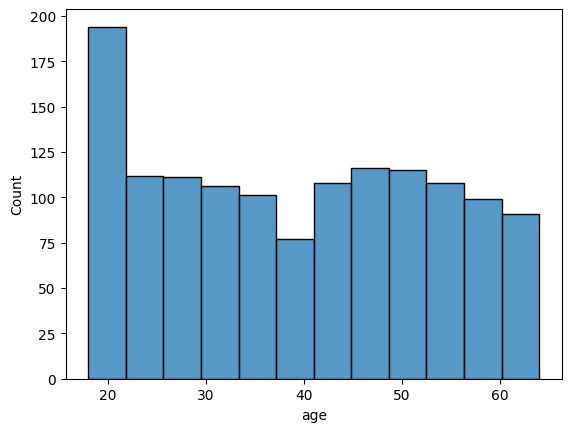

In [ ]:
sns.histplot(df["age"])

<Axes: xlabel='bmi', ylabel='Count'>

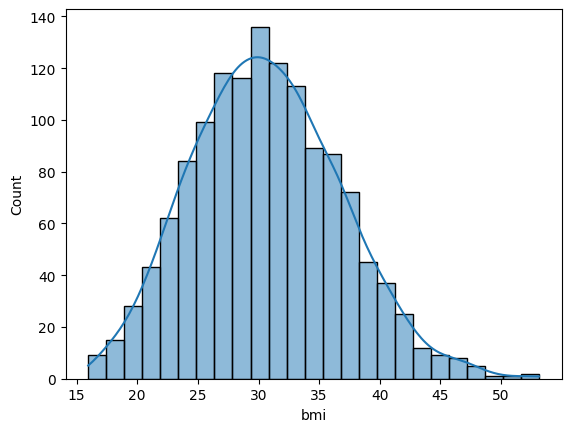

In [ ]:
sns.histplot(df["bmi"],kde = True)

<Axes: xlabel='age'>

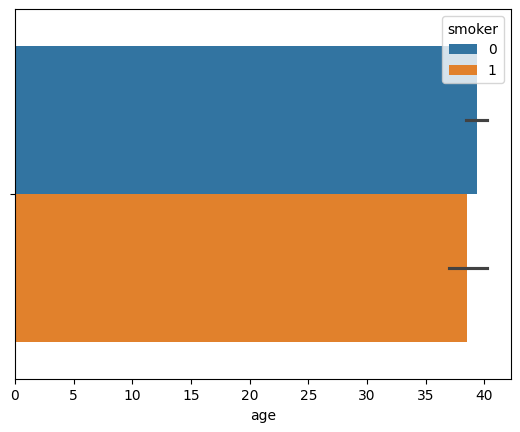

In [ ]:
sns.barplot(x="age",data=df,hue="smoker")

<Axes: xlabel='gender'>

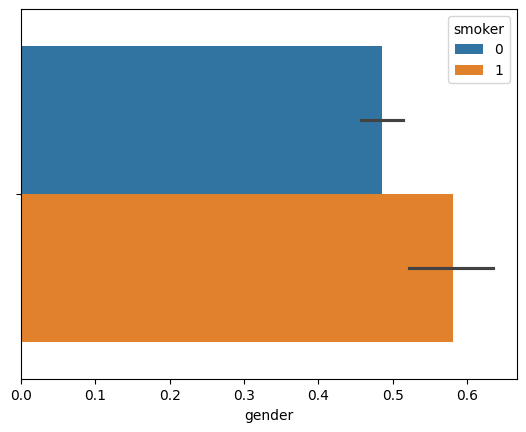

In [ ]:
sns.barplot(x="gender",data=df,hue="smoker")

In [ ]:
x= df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
print(x)

      age  gender     bmi  children  smoker  region      charges
0      19       0  27.900         0       1       3  16884.92400
1      18       1  33.770         1       0       2   1725.55230
2      28       1  33.000         3       0       2   4449.46200
3      33       1  22.705         0       0       1  21984.47061
4      32       1  28.880         0       0       1   3866.85520
...   ...     ...     ...       ...     ...     ...          ...
1333   50       1  30.970         3       0       1  10600.54830
1334   18       0  31.920         0       0       0   2205.98080
1335   18       0  36.850         0       0       2   1629.83350
1336   21       0  25.800         0       0       3   2007.94500
1337   61       0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


In [ ]:
print(y)

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
print(x_train)

      age  gender     bmi  children  smoker  region      charges
216    53       0  26.600         0       0       1  10355.64100
731    53       1  21.400         1       0       3  10065.41300
866    18       1  37.290         0       0       2   1141.44510
202    60       0  24.035         0       0       1  13012.20865
820    45       1  33.700         1       0       3   7445.91800
...   ...     ...     ...       ...     ...     ...          ...
715    60       1  28.900         0       0       3  12146.97100
905    26       0  29.355         2       0       0   4564.19145
1096   51       0  34.960         2       1       0  44641.19740
235    40       0  22.220         2       1       2  19444.26580
1061   57       1  27.940         1       0       2  11554.22360

[1070 rows x 7 columns]


In [ ]:
print(y_train)

216     0
731     1
866     1
202     0
820     1
       ..
715     1
905     0
1096    0
235     0
1061    1
Name: sex, Length: 1070, dtype: int64


In [ ]:
svm_model = SVC(kernel='linear')

In [ ]:
svm_model.fit(x_train, y_train)


y_pred = svm_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)

Accuracy: 95.90%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       137
           1       0.92      1.00      0.96       131

    accuracy                           0.96       268
   macro avg       0.96      0.96      0.96       268
weighted avg       0.96      0.96      0.96       268

